# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса. 

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [38]:
import pandas as pd
import numpy as np

train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")
target = 'selling_price'

Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

In [39]:
# Ваш код здесь
from sklearn.model_selection import train_test_split
train = train.dropna(subset=[target])
Xtrain, Xtest, ytrain, ytest = train.drop(target, axis=1),  test.drop(target, axis=1), train[target], test[target], 

В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [40]:
# Ваш код здесь
Xtrain['mileage'] = Xtrain['mileage'].apply(lambda x:  x.split()[0] if pd.notnull(x) else np.NaN)
Xtest['mileage'] = Xtest['mileage'].apply(lambda x:  x.split()[0] if pd.notnull(x) else np.NaN)


Xtrain['engine'] = Xtrain['engine'].apply(lambda x:  x.split()[0] if pd.notnull(x) else np.NaN)
Xtest['engine'] = Xtest['engine'].apply(lambda x:  x.split()[0] if pd.notnull(x) else np.NaN)


Xtrain['max_power'] = Xtrain['max_power'].apply(lambda x:  x.split()[0] if pd.notnull(x) else np.NaN)
Xtest['max_power'] = Xtest['max_power'].apply(lambda x:  x.split()[0] if pd.notnull(x) else np.NaN);


Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [41]:
# Ваш код здесь
columns = ['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']
Xtrain = Xtrain[columns]
Xtest = Xtest[columns]


Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [42]:
# Ваш код здесь
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
Xtrain[columns] = imputer.fit_transform(Xtrain[columns])
Xtest[columns] = imputer.transform(Xtest[columns])


Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$. 

In [47]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

def train_and_evaluate(model, Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    r2 = r2_score(ytest, y_pred)
    return r2

# Линейная регрессия
lr_model = LinearRegression()
r2_lr = train_and_evaluate(lr_model, Xtrain, ytrain, Xtest, ytest)
print("R^2 для линейной регрессии:", r2_lr)

# Случайный лес
rf_model = RandomForestRegressor()
r2_rf = train_and_evaluate(rf_model, Xtrain, ytrain, Xtest, ytest)
print("R^2 для случайного леса:", r2_rf)

R^2 для линейной регрессии: 0.6485839251280121
R^2 для случайного леса: 0.96425994113191


Какая модель получилась лучше?

In [44]:
# Ваш ответ здесь
# RandomForest

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [46]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2')
grid_search.fit(Xtrain, ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best R^2:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(Xtest)
r2 = r2_score(ytest, y_pred)
print("R^2 on test data:", r2)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R^2: 0.9540136186960041
R^2 on test data: 0.9605449001999324


Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [48]:
# Ваш код здесь
best_model = grid_search.best_estimator_
y_pred = best_model.predict(Xtest)
r2 = r2_score(ytest, y_pred)
print("R^2 on test data:", r2)

R^2 on test data: 0.9605449001999324


Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

<Axes: xlabel='None'>

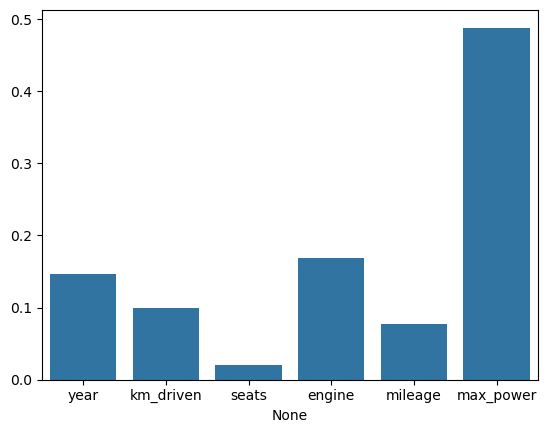

In [56]:
# Ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns
# Получаем важности признаков из лучшей модели
importances = best_model.feature_importances_
features_importances = pd.DataFrame({"features": Xtest.columns, 'coef': importances})
sns.barplot(x=Xtrain.columns, y=importances)